In [8]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

from IPython.display import HTML
import plotly.express as px

import warnings

In [9]:
warnings.filterwarnings('ignore')

# Load dataset
calories = pd.read_csv("C:/Users/KIIT/Downloads/calories.csv")
exercise = pd.read_csv("C:/Users/KIIT/Downloads/exercise.csv")


In [10]:
# Merge datasets
data = pd.merge(exercise, calories, on='User_ID')

# Calculate BMI and add as a new feature
data['BMI'] = data['Weight'] / (data['Height'] / 100) ** 2

# Data preprocessing
def preprocess_data(df):
    df = df.dropna()
    
    # Encode categorical variables
    categorical_cols = df.select_dtypes(include=['object']).columns
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # One-hot encoding
    
    # Scale numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    return df

data = preprocess_data(data)

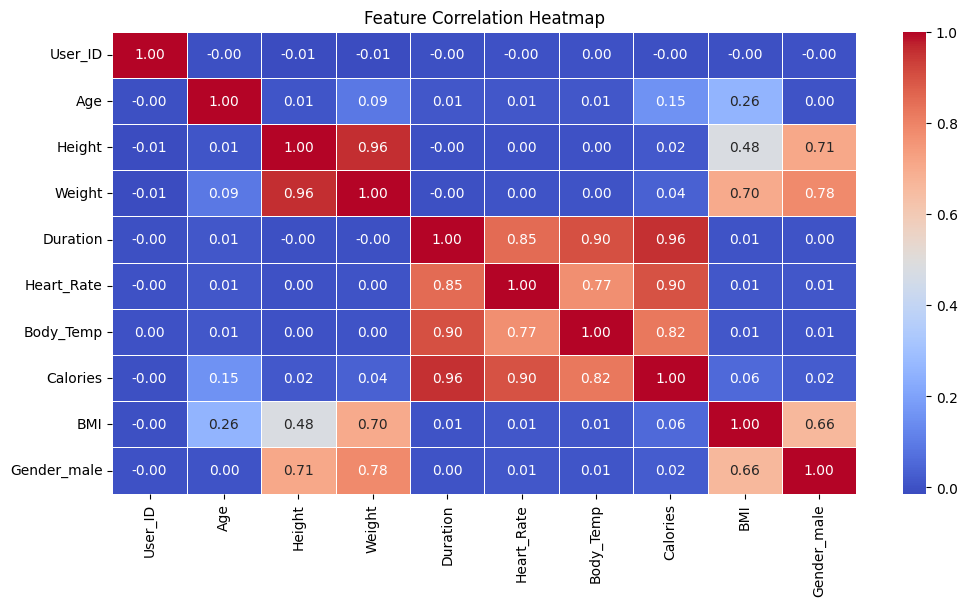

In [11]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
# BMI Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=data.index, y=data['BMI'], color='blue')
plt.xlabel('Index')
plt.ylabel('BMI')
plt.title('BMI Distribution')
plt.show()

In [ ]:
# Histogram of key features
data.hist(figsize=(12, 8), bins=20)
plt.suptitle('Feature Distributions')
plt.show()


In [ ]:
# Pairplot for relationships
sns.pairplot(data.sample(500))
plt.show()

In [ ]:
# Feature Selection - Checking importance using RandomForest
feature_selector = RandomForestRegressor(n_estimators=100, random_state=42)
X = data.drop(columns=['Calories'])
y = data['Calories']
feature_selector.fit(X, y)
feature_importance = pd.Series(feature_selector.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

In [ ]:
# Best model
best_model = grid_search.best_estimator_

# Train model
best_model.fit(X_train, y_train)

In [ ]:
# Best model
best_model = grid_search.best_estimator_

# Train model
best_model.fit(X_train, y_train)

# Evaluate model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Model Mean Squared Error: {mse}')
print(f'Model R² Score: {r2}')

# Visualization - Actual vs Predicted
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')
plt.show()

# Residual Distribution
residuals = y_test - y_pred
sns.histplot(residuals, bins=20, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.show()